# To carry out statistical analysis

### This script includes various parameters like R squared, RMSE, MAE etc. to carry out correlation analysis between two water level time series data

In [13]:
# import required packages

import pandas as pd
import HydroErr as he
import os
import numpy as np
from sklearn.linear_model import LinearRegression

# packages to visualize the data
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt # To visualize

In [14]:
# Load Data_1

data_1 = pd.read_excel(r'C:\Users\Win8\Desktop\ME\Altimeter_mod\altimeter data\compare data_within aoi\compare_inter approach\CGLS_DAHITI\1\91.0320_dahiti_319_water_level_altimetry.xlsx', engine='openpyxl')

# Select the datetime and the water level columns from data_1
data_1 = data_1[["Date","Water level"]]
print(data_1)
data_1.shape

          Date  Water level
0   2008-07-18       40.812
1   2008-07-28       41.316
2   2008-08-17       41.030
3   2008-09-16       40.297
4   2008-09-25       39.148
..         ...          ...
399 2020-06-28       42.247
400 2020-07-08       41.231
401 2020-07-18       41.861
402 2020-07-28       41.716
403 2020-08-16       41.301

[404 rows x 2 columns]


(404, 2)

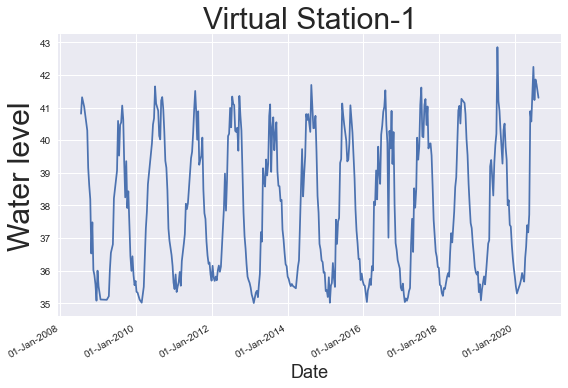

In [15]:
# Plot timeseries graph

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import dates
plt.style.use('seaborn')
data_1['Date'] = pd.to_datetime(data_1['Date'])
data_1.sort_values('Date', inplace=True)
Date = data_1['Date']
Water_level = data_1['Water level']
fig, ax = plt.subplots()
ax.plot(Date, Water_level)
# plt.plot_date(Date, Water_level, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = dates.DateFormatter('%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Virtual Station-1', fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Water level', fontsize=30)
plt.tight_layout() 
plt.show()

# fig.savefig(r'C:\Work\Altimeter _data\compare data_within aoi\dahiti\91.0320_dahiti_timeseries.png')

In [16]:
# Load Data_2

data_2 = pd.read_excel(r'C:\Users\Win8\Desktop\ME\Altimeter_mod\altimeter data\compare data_within aoi\compare_inter approach\CGLS_DAHITI\1\Virtual Station-4(91.0279)_jason2-3.xlsx', engine='openpyxl')

# Select the datetime and the water level columns from data_2
data_2 = data_2[["Date","Water level"]]
print(data_2)
data_2.shape

          Date  Water level
0   2008-07-18        41.22
1   2008-07-28        41.61
2   2008-08-17        41.23
3   2008-09-16        40.63
4   2008-09-25        39.45
..         ...          ...
399 2020-06-28        42.42
400 2020-07-08        41.33
401 2020-07-18        41.86
402 2020-07-28        41.81
403 2020-08-16        41.27

[404 rows x 2 columns]


(404, 2)

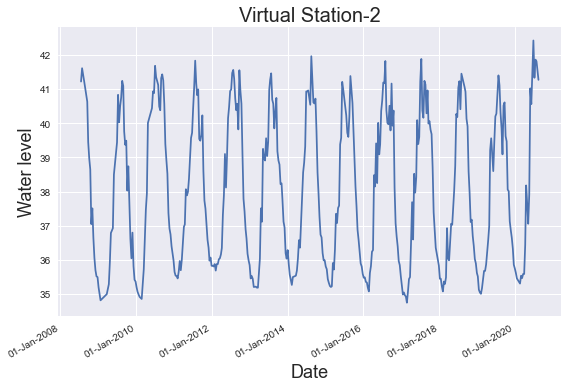

In [17]:
# Plot timeseries 

data_2['Date'] = pd.to_datetime(data_2['Date'])
data_2.sort_values('Date', inplace=True)
Date = data_2['Date']
Water_level = data_2['Water level']
fig, ax = plt.subplots()
ax.plot(Date, Water_level)
# plt.plot_date(Date, Water_level, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = dates.DateFormatter('%d-%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Virtual Station-2', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Water level', fontsize=18)
plt.tight_layout()
plt.show()

# fig.savefig(r'C:Work\Altimeter _data\compare data_within aoi\ISRO_altimeter data\91.0304_isro_timeseries.png')

In [18]:
# Select water level column from both the dataset.

X = data_1.iloc[:, 1].values.reshape(-1, 1) # values converts it into a numpy array
Y = data_2.iloc[:, 1].values.reshape(-1, 1) # -1 means that calculate the dimension
# print(X)
# print(Y)

# Prepare linear regression model and fit the water level data X and Y
model = LinearRegression(fit_intercept=True)
model = model.fit(X, Y)

Y_pred = model.predict(X)

# model.intercept_

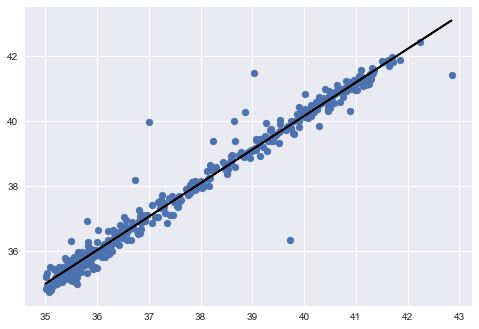

In [19]:
# Visualize scatter plot

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='black')

**To make better attractive plots and have the control of changing different components of the plots as per our requirements, some modifications are done and it is described in the next line of code.** 

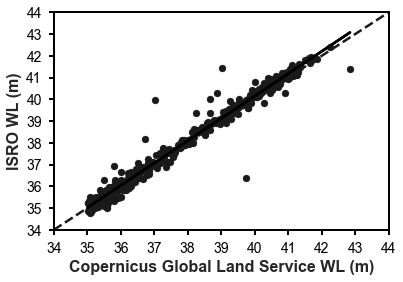

In [22]:
# Some necessary imports for visualizing plots
plt.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# To provide spacing intervals
tick_spacing = 1

# To allign different dimensions to plot.
f, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X, Y, c=".1")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# set the limits for x-axis and y-axis manually
ax.set(xlim=(34, 44), ylim=(34, 44))

diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".1", linewidth=2.5)

def on_change(axes):
    #When this function is called it checks the current
    #values of xlim and ylim and modifies diag_line accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)
    
# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


# To fit the line and apply plotting parameters
Y_pred=model.predict(X)
plt.plot(X,Y_pred,color='black',linewidth=2.5)

# Adjustments in the plots
plt.ylabel('ISRO WL (m)',fontsize=16,fontweight='bold')
plt.xlabel('Copernicus Global Land Service WL (m)',fontsize=16,fontweight='bold')
plt.savefig('Water_level_variation.png')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14


ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
    ax.spines[side].set_linewidth(2)

# Custom ticks
plt.tick_params(axis='x',colors='black',direction='out',length=5,width=2)
plt.tick_params(axis='y',colors='black',direction='out',length=5,width=2)
plt.grid(b=None)

plt.show()


# f.savefig(r'C:\Work\Altimeter _data\compare data_within aoi\compare\ISRO_CGLS\1\statistical plot.png')




In [26]:
# To find R-squared value
r_sq = model.score(X,Y)
r2 = np.round(r_sq, 3)
print('coefficient of determination:', r2)

coefficient of determination: 0.972


In [27]:
X_var = data_1['Water level'] # independent variable
y_var = data_2['Water level'] # dependent variable

In [28]:
# to convert dataframe into 1D array
X_var = X_var.values.flatten()
# print(X_var)

In [29]:
# to convert dataframe into 1D array
y_var = y_var.values.flatten()
# print(y_var)

In [30]:
# # Compute the the Coefficient of Determination (r2), remember it is without intercep
# sim = np.array(X_var)
# obs = np.array(y_var)
# r2 = np.round(he.r_squared(sim, obs), 3)
# print('Coefficient of Determination (r2):', r2)

In [31]:
# Compute the root mean square error (RMSE) between the simulated and observed data
sim = np.array(X_var)
obs = np.array(y_var)
RMSE = np.round(he.rmse(sim, obs), 3)
print('root mean square error (RMSE):', RMSE)

root mean square error (RMSE): 0.381


In [32]:
# # Compute the pearson correlation coefficient, may be without intercept
sim = np.array(X_var)
obs = np.array(y_var)
r = np.round(he.pearson_r(sim, obs), 3)
print('pearson correlation coefficient:', r)

pearson correlation coefficient: 0.986


In [33]:
from scipy.stats import ttest_ind
p_value = np.round(ttest_ind(X_var, y_var).pvalue, 3)
print('p-value:', p_value)

p-value: 0.541


In [34]:
# Compute the the mean absolute error (MAE)
sim = np.array(X_var)
obs = np.array(y_var)
MAE = np.round(he.mae(sim, obs), 3)
print('mean absolute error (MAE)', MAE)

mean absolute error (MAE) 0.23


In [35]:
# Compute the the mean absolute percentage error (MAPE)
sim = np.array(X_var)
obs = np.array(y_var)
MAPE = np.round(he.mape(sim, obs), 3)
print('mean absolute percentage error (MAPE)', MAPE)

mean absolute percentage error (MAPE) 0.603


In [36]:
# Compute the Nash-Sutcliffe Efficiency
sim = np.array(X_var)
obs = np.array(y_var)
NSE = np.round(he.nse(sim, obs), 3)
print('Nash-Sutcliffe Efficiency (NSE)', NSE)

Nash-Sutcliffe Efficiency (NSE) 0.969


In [37]:
# Compute the modified Nash-Sutcliffe efficiency (NSEmod)
sim = np.array(X_var)
obs = np.array(y_var)
MNSE = np.round(he.nse_mod(sim, obs), 3)
print('modified Nash-Sutcliffe Efficiency (MNSE)', MNSE)

modified Nash-Sutcliffe Efficiency (MNSE) 0.883


In [38]:
# Compute the Kling-Gupta efficiency (2012)
sim = np.array(X_var)
obs = np.array(y_var)
KGE_2012 = np.round(he.kge_2012(sim, obs), 3)
print('Kling-Gupta efficiency (2012)', KGE_2012)
# Returns (r, alpha, beta, kge)
r, alpha, beta, kge = np.round(he.kge_2012(sim, obs, return_all=True), 3)
print('r, alpha, beta, kge values:', r, alpha, beta, kge)

Kling-Gupta efficiency (2012) 0.959
r, alpha, beta, kge values: 0.986 0.962 0.998 0.959


In [40]:
# Scipy module can also help to provide various parameters like slope, intercept and so on.

from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(X_var,y_var)
print(intercept)

-0.9632422865076293


In [41]:
# Scikit learn module can also help to generate various parameters
slr_slope =np.round(model.coef_, 3)
slr_intercept =np.round(model.intercept_, 3) 
print(slr_slope)
print(slr_intercept)

[[1.028]]
[-0.963]


# That's it, Thank you